In [1]:
%pylab inline
import scipy
from scipy.sparse import coo_matrix, block_diag, identity, hstack
#import matplotlib as mpl
import matplotlib.pyplot as plt
from pyiga import bspline, vform, geometry, vis, solvers, utils, topology
from pyiga import assemble
#from patchmesh import *
from sksparse.cholmod import cholesky
#from patchmesh3D import *
#from multipatch import *
from pyiga import adaptive as adap

numpy.set_printoptions(linewidth=100000)
numpy.set_printoptions(precision=5)

Populating the interactive namespace from numpy and matplotlib


In [4]:
kvs = [2 * (bspline.make_knots(1, 0.0, 1.0, 1),)]
geos = [geometry.unit_square()]
patches = [(k, g) for k, g in zip(kvs,geos)]
M = topology.PatchMesh(patches)
M.split_patches({0:1});

[0.      0.0102  0.02041 0.03061 0.04082 0.05102 0.06122 0.07143 0.08163 0.09184 0.10204 0.11224 0.12245 0.13265 0.14286 0.15306 0.16327 0.17347 0.18367 0.19388 0.20408 0.21429 0.22449 0.23469 0.2449  0.2551  0.26531 0.27551 0.28571 0.29592 0.30612 0.31633 0.32653 0.33673 0.34694 0.35714 0.36735 0.37755 0.38776 0.39796 0.40816 0.41837 0.42857 0.43878 0.44898 0.45918 0.46939 0.47959 0.4898  0.5     1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      1.      0.5     0.4898  0.47959 0.46939 0.45918 0.44898 0.43878 0.42857 0.41837 0.40816 0.39796 0.38776 0.37755 0.36735 0.35714 0.34694 0.33673 0.32653 0.31633 0.30612 0.29592 0.28571 0.27551 0.26531 0.2551 

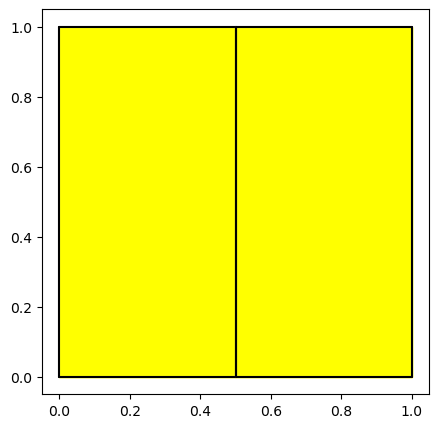

In [5]:
M.draw(color={0:'yellow'})

In [2]:
def drawSkeleton(MP):
    for (p,b,_),(_,_,_),_ in MP.intfs:
        ax,sd=assemble.int_to_bdspec(b)
        geo=MP.mesh.geos()[p]
        kvs=MP.mesh.kvs()[p]
        grid=np.linspace(geo.support[(ax+1)%2][0], geo.support[(ax+1)%2][1],kvs[(ax+1)%2].numdofs)
        if (p,b) == (4,1) or (p,b)==(5,3): grid=grid[1:-1]
        if ax==0:
            Z = geo.eval(grid,np.array([geo.support[0][sd]]))
        else:
            Z = geo.eval(np.array([geo.support[1][sd]]),grid)
        plt.scatter(Z[:,:,0].ravel(),Z[:,:,1].ravel(),color='red',s=15,zorder=3)
    
def drawInterior(MP,r=1):
    for p in range(MP.numpatches):
        kvs, geo = MP.mesh.kvs()[p], MP.mesh.geos()[p]
        gridx=np.linspace(geo.support[0][0],geo.support[0][1] ,kvs[0].numdofs)
        gridy=np.linspace(geo.support[1][0],geo.support[1][1],kvs[1].numdofs)
        Z = geo.eval(gridx,gridy)
        if r != 0:
            plt.scatter(Z[r:-r,r:-r,0].ravel(),Z[r:-r,r:-r,1].ravel(),color='black',s=15)
        else:
            for idx in MP.mesh.outer_boundaries:
                if (p,2) not in MP.mesh.outer_boundaries[idx]: Z = Z[1:,:,:]
                if (p,3) not in MP.mesh.outer_boundaries[idx]: Z = Z[:-1,:,:]
                if (p,0) not in MP.mesh.outer_boundaries[idx]: Z = Z[:,1:,:]
                if (p,1) not in MP.mesh.outer_boundaries[idx]: Z = Z[:,:-1,:]
            plt.scatter(Z[:,:,0].ravel(),Z[:,:,1].ravel(),color='black',s=15,zorder=2)

In [6]:
2*(bspline.make_knots(2,0,1,2),)

(KnotVector(array([0. , 0. , 0. , 0.5, 1. , 1. , 1. ]), 2),
 KnotVector(array([0. , 0. , 0. , 0.5, 1. , 1. , 1. ]), 2))

In [9]:
patches=[(2*(bspline.make_knots(2,0,1,2),),geometry.unit_square())]
M = topology.PatchMesh(patches)
M.split_patches();
#M.refine({0:None});
M.split_patches({0:None});
M.refine({0:None});
MP=assemble.Multipatch(M, automatch=True)

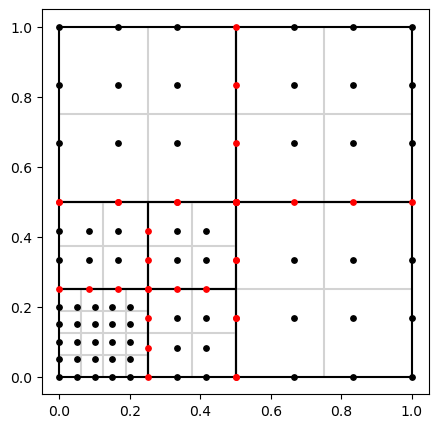

In [10]:
MP.mesh.draw(patch_idx=False)
drawInterior(MP,r=0)
drawSkeleton(MP)